In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Quick look
print(df.shape)
df.head()


(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
# Summary statistics: numerical and categorical
display(df.describe(include='all'))

# Check class balance
print("\nRevenue distribution:")
print(df['Revenue'].value_counts(normalize=True) * 100)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN



Revenue distribution:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [3]:
# Separate Feature Types
numerical = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

categorical = [
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend'
]


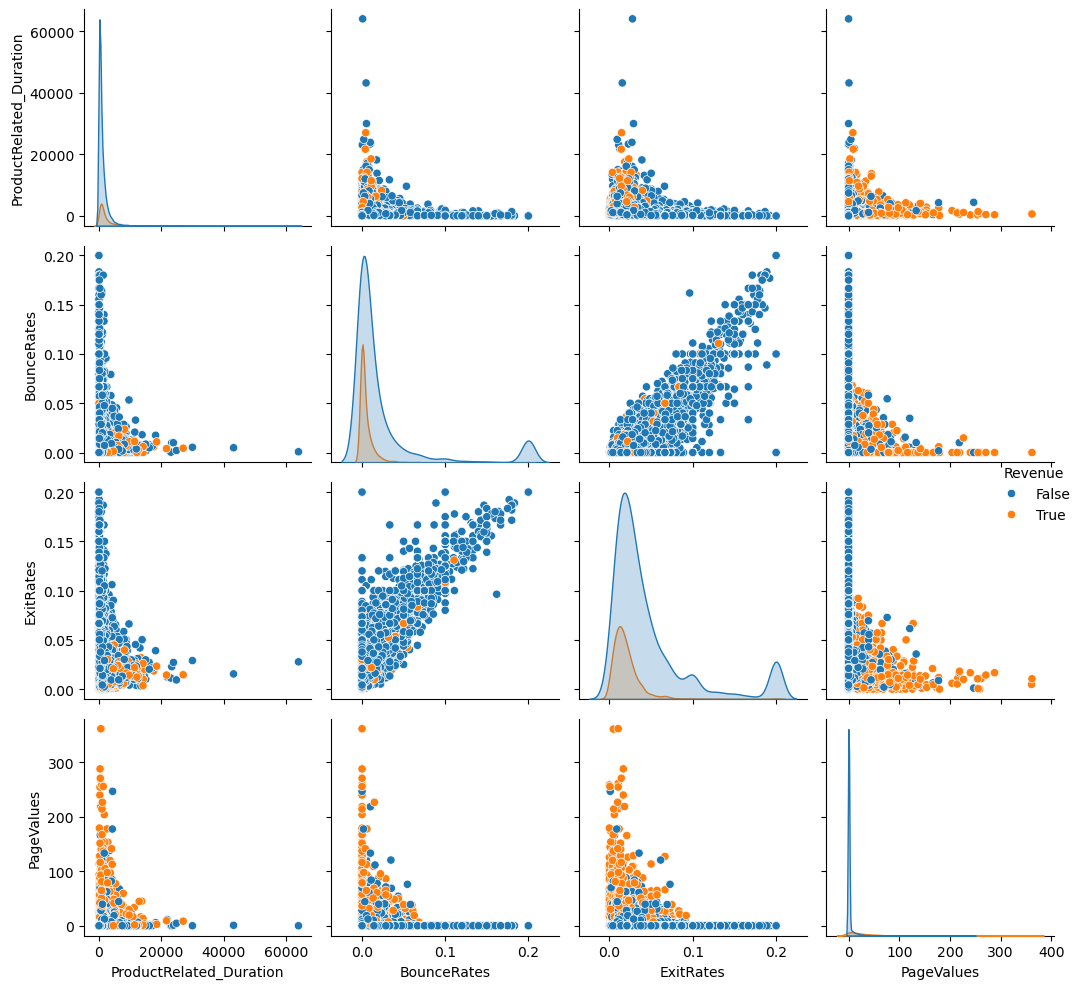

In [4]:
# Core Feature Pair Relationships
# These variables are known to differentiate purchase vs non-purchase behavior
cols = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']
sns.pairplot(df[cols], hue='Revenue', height=2.5)
plt.tight_layout()
plt.show()

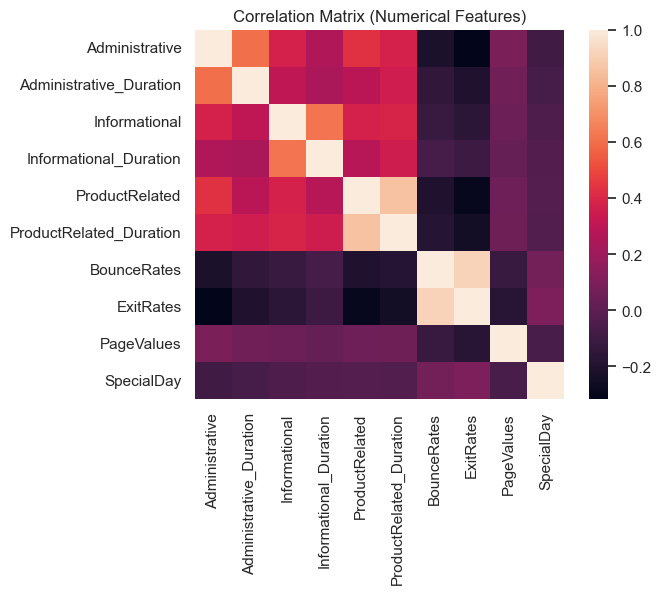

In [5]:
# Correlation Matrix
cm = np.corrcoef(df[numerical].values.T)

sns.set(font_scale=1)
heatmap = sns.heatmap(cm, cbar=True, annot=False,
                      square=True, fmt='.2f',
                      yticklabels=numerical,
                      xticklabels=numerical)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

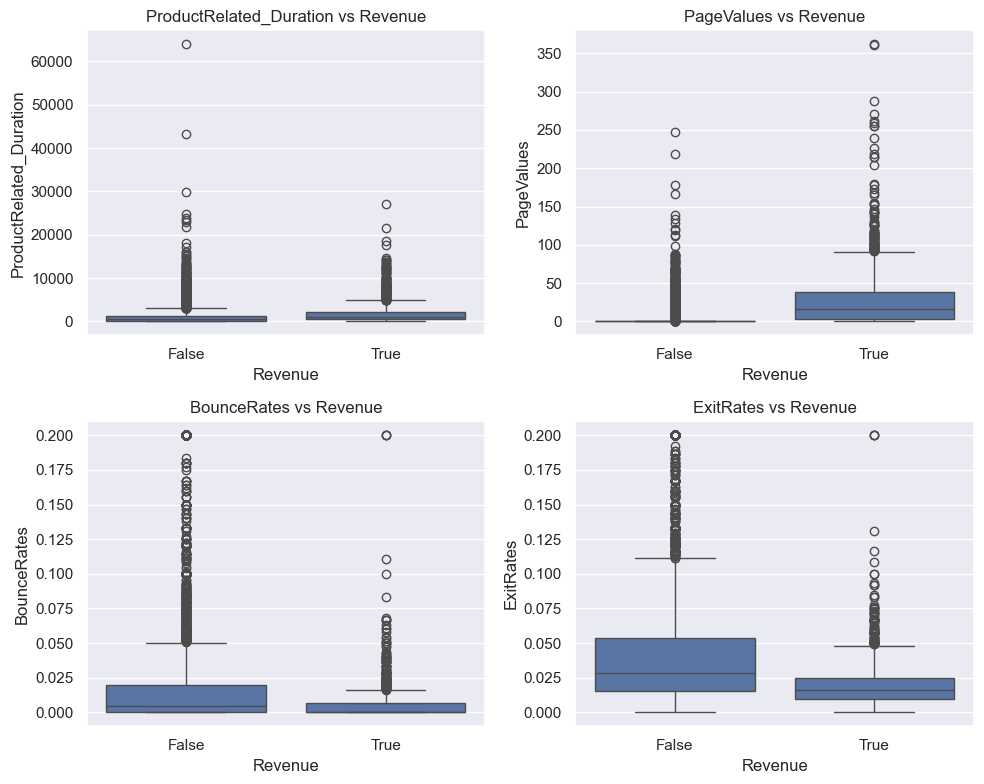

In [6]:
# Boxplots to Compare Purchase vs Non-Purchase
fig, axes = plt.subplots(2, 2, figsize=(10,8))

sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df, ax=axes[0,0])
axes[0,0].set_title('ProductRelated_Duration vs Revenue')

sns.boxplot(x='Revenue', y='PageValues', data=df, ax=axes[0,1])
axes[0,1].set_title('PageValues vs Revenue')

sns.boxplot(x='Revenue', y='BounceRates', data=df, ax=axes[1,0])
axes[1,0].set_title('BounceRates vs Revenue')

sns.boxplot(x='Revenue', y='ExitRates', data=df, ax=axes[1,1])
axes[1,1].set_title('ExitRates vs Revenue')

plt.tight_layout()
plt.show()


In [7]:
# Categorical Patterns (crosstab)
print("\nVisitorType vs Revenue:")
print(pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index'))

print("\nMonth vs Revenue:")
print(pd.crosstab(df['Month'], df['Revenue'], normalize='index'))



VisitorType vs Revenue:
Revenue               False     True 
VisitorType                          
New_Visitor        0.750885  0.249115
Other              0.811765  0.188235
Returning_Visitor  0.860677  0.139323

Month vs Revenue:
Revenue     False     True 
Month                      
Aug      0.824480  0.175520
Dec      0.874928  0.125072
Feb      0.983696  0.016304
Jul      0.847222  0.152778
June     0.899306  0.100694
Mar      0.899318  0.100682
May      0.891498  0.108502
Nov      0.746498  0.253502
Oct      0.790528  0.209472
Sep      0.808036  0.191964


In [8]:
# Model Preparation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid', context='notebook')

# Target variable
y = df['Revenue'].astype(int)   # Convert True/False → 1/0

# Select features (we will refine later — for now include all numerics)
X = df[numerical]


In [9]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# LASSO (L1)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
# Ridge (L2)
ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000)

lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

lasso_probs = lasso.predict_proba(X_test_scaled)[:,1]
ridge_probs = ridge.predict_proba(X_test_scaled)[:,1]

lasso_preds = (lasso_probs > 0.5).astype(int)
ridge_preds = (ridge_probs > 0.5).astype(int)


In [18]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} | Accuracy: {acc:.4f}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print('--------------------------------\n')

evaluate_model("LASSO Logistic Regression", y_test, lasso_preds)
evaluate_model("Ridge Logistic Regression", y_test, ridge_preds)


LASSO Logistic Regression | Accuracy: 0.8796
[[2041   43]
 [ 254  128]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.75      0.34      0.46       382

    accuracy                           0.88      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.87      0.88      0.86      2466

--------------------------------

Ridge Logistic Regression | Accuracy: 0.8796
[[2041   43]
 [ 254  128]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.75      0.34      0.46       382

    accuracy                           0.88      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.87      0.88      0.86      2466

--------------------------------



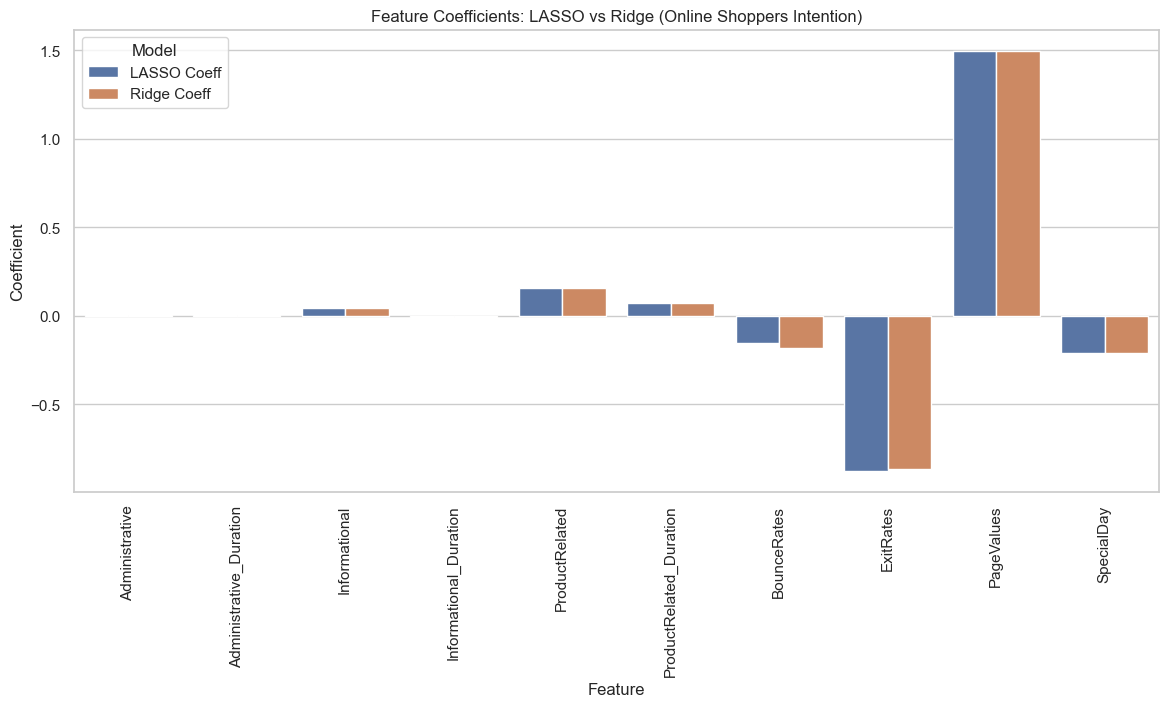

In [19]:
# Compare feature coefficients

features = X.columns

coeff_df = pd.DataFrame({
    'Feature': features,
    'LASSO Coeff': lasso.coef_[0],
    'Ridge Coeff': ridge.coef_[0]
})

coeff_df_melted = coeff_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

plt.figure(figsize=(14,6))
sns.barplot(data=coeff_df_melted, x='Feature', y='Coefficient', hue='Model')
plt.xticks(rotation=90)
plt.title('Feature Coefficients: LASSO vs Ridge (Online Shoppers Intention)')
plt.show()